In [1]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'c:\\Users\\jaayg\\OneDrive\\Escritorio\\data_project\\songs_population\\notebooks'

In [3]:
os.chdir('..')

In [4]:
os.chdir('data')

In [5]:
os.chdir('raw')

In [6]:
os.chdir('music_dataset')

In [7]:
os.getcwd()

'c:\\Users\\jaayg\\OneDrive\\Escritorio\\data_project\\songs_population\\data\\raw\\music_dataset'

In [8]:
df_songs = pd.read_csv('music_genre.csv')

In [9]:
df_songs.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


Observamos que los siguientes datos tienen 5 filas 'vacias', Pero todos estan casi completos

In [10]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [11]:
df_songs = df_songs.dropna(axis=0)

In [12]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

## Analizamos variables y las modificamos

In [13]:
df_songs['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

In [14]:
df_songs[['tempo', 'obtained_date','mode']]

,tempo,obtained_date,mode
0,100.889,4-Apr,Minor
1,115.00200000000001,4-Apr,Minor
2,127.994,4-Apr,Major
3,128.014,4-Apr,Major
4,145.036,4-Apr,Major
...,...,...,...
50000,98.02799999999999,4-Apr,Major
50001,122.04299999999999,4-Apr,Major
50002,131.079,4-Apr,Major
50003,75.88600000000001,4-Apr,Minor


Tempo vemos que es una variable de tipo string que queremos pasar a numerica

In [15]:
# We want to observete what's happening with the 'tempo' column
col_convertida = pd.to_numeric(df_songs['tempo'], errors='coerce')

# Encuentra los valores que no pudieron convertirse (son NaN después de la conversión)
valores_invalidos = df_songs[col_convertida.isna()]['tempo'].unique()
print(valores_invalidos)

['?']


Observamos que hay un valor no numérico en la columna 'tempo', que es '?'. Vamos a eliminarlo.

In [16]:
df_songs['tempo'] = pd.to_numeric(df_songs['tempo'], errors='coerce').round(3)

In [17]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [18]:
df_songs['mode'].unique()

array(['Minor', 'Major'], dtype=object)

Redefinimos la variable tempo, pero ahora hay valores faltantes que hay que evaluar

In [19]:
df_songs = df_songs.dropna(axis=0)

In [20]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       45020 non-null  float64
 1   artist_name       45020 non-null  object 
 2   track_name        45020 non-null  object 
 3   popularity        45020 non-null  float64
 4   acousticness      45020 non-null  float64
 5   danceability      45020 non-null  float64
 6   duration_ms       45020 non-null  float64
 7   energy            45020 non-null  float64
 8   instrumentalness  45020 non-null  float64
 9   key               45020 non-null  object 
 10  liveness          45020 non-null  float64
 11  loudness          45020 non-null  float64
 12  mode              45020 non-null  object 
 13  speechiness       45020 non-null  float64
 14  tempo             45020 non-null  float64
 15  obtained_date     45020 non-null  object 
 16  valence           45020 non-null  float6

In [21]:
df_songs.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


Vemos que hay valores atipicos en la duracion de las canciones pues no tiene sentido que haya valores negativos en esta columna

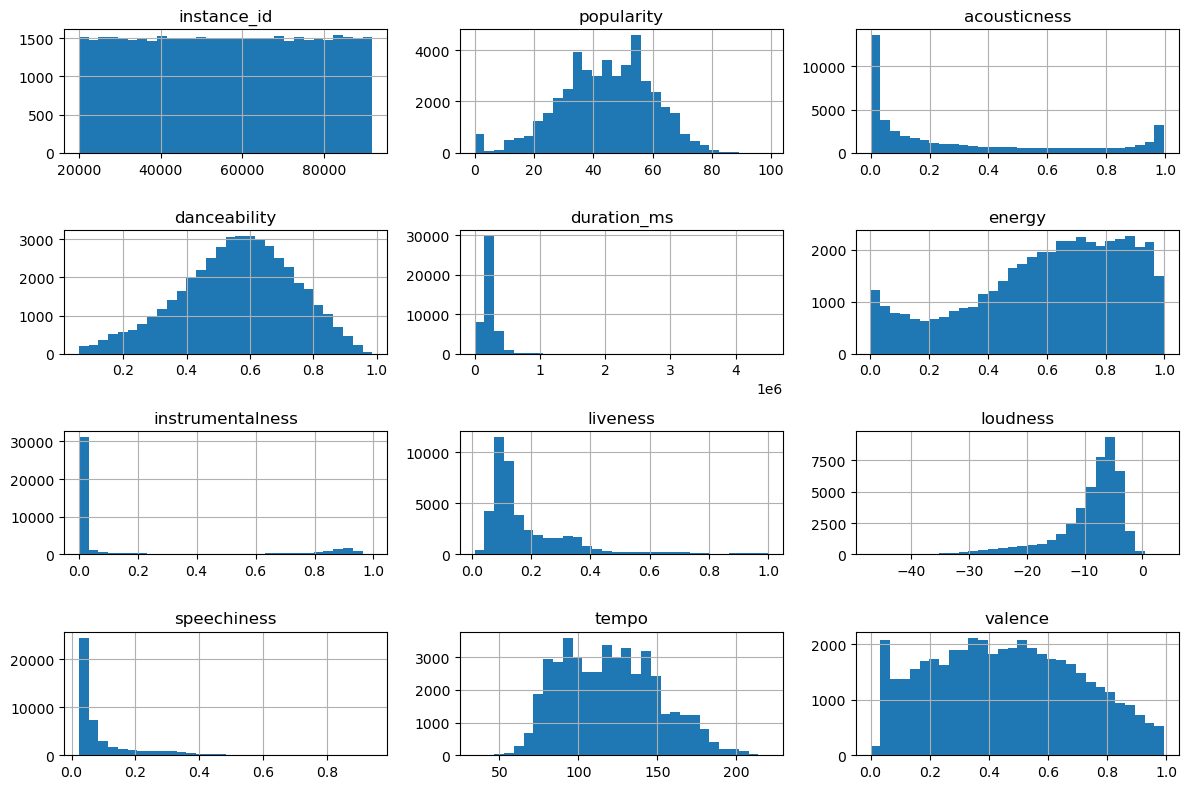

In [22]:
#Visualize the distribution of the columns
df_songs.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

Decidimos borrar la columna duration ya que es una columna que no nos va a aportar mucha informacion si tratamos de corregirla, pues la mayoria de los datos se encuentran en un rango invalido.

In [23]:
df_songs = df_songs.drop(columns=['duration_ms'])

In [24]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       45020 non-null  float64
 1   artist_name       45020 non-null  object 
 2   track_name        45020 non-null  object 
 3   popularity        45020 non-null  float64
 4   acousticness      45020 non-null  float64
 5   danceability      45020 non-null  float64
 6   energy            45020 non-null  float64
 7   instrumentalness  45020 non-null  float64
 8   key               45020 non-null  object 
 9   liveness          45020 non-null  float64
 10  loudness          45020 non-null  float64
 11  mode              45020 non-null  object 
 12  speechiness       45020 non-null  float64
 13  tempo             45020 non-null  float64
 14  obtained_date     45020 non-null  object 
 15  valence           45020 non-null  float64
 16  music_genre       45020 non-null  object

## Analicemos que variables seran utiles para el modelo

Dado que el nombre de la cancion, el artista y la fecha no nos interesan tando debemos hacer un nuevo dataset con las variables de interes

In [25]:
df = df_songs.drop(columns=['obtained_date', 'instance_id', 'artist_name','track_name'])
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45020 entries, 0 to 50004
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        45020 non-null  float64
 1   acousticness      45020 non-null  float64
 2   danceability      45020 non-null  float64
 3   energy            45020 non-null  float64
 4   instrumentalness  45020 non-null  float64
 5   key               45020 non-null  object 
 6   liveness          45020 non-null  float64
 7   loudness          45020 non-null  float64
 8   mode              45020 non-null  object 
 9   speechiness       45020 non-null  float64
 10  tempo             45020 non-null  float64
 11  valence           45020 non-null  float64
 12  music_genre       45020 non-null  object 
dtypes: float64(10), object(3)
memory usage: 4.8+ MB


Guardamos el archivo para trabajar en otros notebooks con el

In [27]:
os.getcwd()

'c:\\Users\\jaayg\\OneDrive\\Escritorio\\data_project\\songs_population\\data\\raw\\music_dataset'

In [30]:
os.chdir('..')

In [31]:
os.getcwd()

'c:\\Users\\jaayg\\OneDrive\\Escritorio\\data_project\\songs_population\\data\\raw'

In [33]:
os.chdir('..')

In [35]:
os.getcwd()

'c:\\Users\\jaayg\\OneDrive\\Escritorio\\data_project\\songs_population\\data'

In [38]:
os.chdir('processed')

In [39]:
os.getcwd()

'c:\\Users\\jaayg\\OneDrive\\Escritorio\\data_project\\songs_population\\data\\processed'

In [40]:
df.to_csv('cleaned_music_populatin.csv', index=False)